<a href="https://colab.research.google.com/github/swarnava-96/Pneumonia-Detection-using-VGG16/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pneumonia Detection using Transfer Learning (VGG16)**
In this Transfer Learning Project, we will predict whether a person is suffering from a Pneumonia or not. 

In [1]:
cd "/content/drive/MyDrive/New Data"

/content/drive/MyDrive/New Data


In [2]:
# Installing tensorflow version 2.5.0

!pip install tensorflow==2.5

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 462 kB 62.7 MB/s 
     |████████████████████████████████| 4.0 MB 45.6 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [3]:
import tensorflow as tf

In [4]:
# Lets check the version of tensorflow

tf.__version__

'2.5.0'

In [5]:
# Importing the necessary libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Resizing all the images

IMAGE_SIZE = [224,224]

train_path = "/content/drive/MyDrive/New Data/train"
valid_path = "/content/drive/MyDrive/New Data/test"

In [7]:
# Inputting the VGG16 library and keeping the initial and final layer false as we dont want to classify 1000 categories. We have only two categories that is Pneumonia and not pneumonia.
# We are dropping the first layer too so that we can give our own image size
# The +3 is the RGB dimension that we need to add. Here we will be using imagenet weights.

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
# We should not train the existing weights otherwise the weights that we captured will get changed

for layer in vgg.layers:
  layer.trainable = False

In [9]:
# Lets check the number of output classes

folders = glob("/content/drive/MyDrive/New Data/train/*")

In [10]:
# Our layers - we can add more if we want. Here we will flatten the existing layers

x = Flatten()(vgg.output)

In [11]:
# Lets create the output layer
prediction = Dense(len(folders), activation = "softmax")(x)

# Creating a model object
model = Model(inputs = vgg.input, outputs = prediction)

In [12]:
# Lets see the model summary

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# Compiling the model - telling the model what cost and optimizatiom method to use

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [14]:
# Using the ImageDataGenerator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Making sure that we provide the same target size as initialized for the image size -- passing the train images to our model

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/New Data/train/",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 5216 images belonging to 2 classes.


In [16]:
# Passing the test images to our model

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/New Data/test/",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 624 images belonging to 2 classes.


In [17]:
# Model Fitting

r = model.fit_generator(training_set, validation_data = test_set, epochs = 5, steps_per_epoch = len(training_set), validation_steps = len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 2568s 16s/step - loss: 0.2336 - accuracy: 0.9105 - val_loss: 0.3054 - val_accuracy: 0.8958
Epoch 2/5
163/163 [==============================] - 1803s 11s/step - loss: 0.1123 - accuracy: 0.9580 - val_loss: 0.3158 - val_accuracy: 0.9022
Epoch 3/5
163/163 [==============================] - 1774s 11s/step - loss: 0.0892 - accuracy: 0.9643 - val_loss: 0.2896 - val_accuracy: 0.9038
Epoch 4/5
163/163 [==============================] - 1769s 11s/step - loss: 0.0830 - accuracy: 0.9720 - val_loss: 0.2670 - val_accuracy: 0.9087
Epoch 5/5
163/163 [==============================] - 1770s 11s/step - loss: 0.0812 - accuracy: 0.9689 - val_loss: 0.3094 - val_accuracy: 0.9006


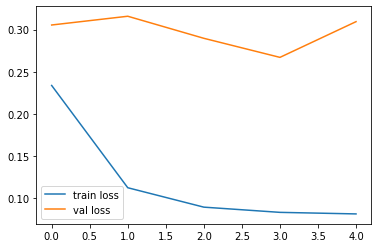

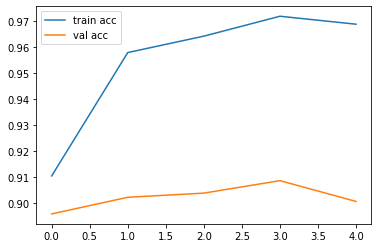

<Figure size 432x288 with 0 Axes>

In [19]:
# Plotting the loss
plt.plot(r.history["loss"], label = "train loss")
plt.plot(r.history["val_loss"], label = "val loss")
plt.legend()
plt.show();
plt.savefig("LossVal_loss")

# Plotting the accuracy
plt.plot(r.history["accuracy"], label = "train acc")
plt.plot(r.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show();
plt.savefig("AccVal_acc")

In [21]:
# Saving the model to reuse it later

from tensorflow.keras.models import load_model
model.save("model_vgg16.h5")

In [28]:
# Prediction and Validation

from tensorflow.keras.models import load_model
from keras_preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [31]:
# Loading the model

model = load_model("model_vgg16.h5")

In [29]:
# Lets see how the model predicts on the validation dataset

img = image.load_img("/content/drive/MyDrive/New Data/val/PNEUMONIA/person1946_bacteria_4874.jpeg", target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [30]:
# Lets see the results

classes

array([[0., 1.]], dtype=float32)

We can see the model correctly predicts that the person is having Pneumonia.

In [32]:
# Lets try with a normal persons chest xray

img = image.load_img("/content/drive/MyDrive/New Data/val/NORMAL/NORMAL2-IM-1436-0001.jpeg", target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [34]:
# Lets see the results

classes

array([[1.000000e+00, 7.454056e-23]], dtype=float32)

The model correctly predicts that the person is not having Pneumonia.